## Fallas Cardíacas 
### Descripcion de los atributos 


In [1]:
import pandas as pd 
from sklearn  import tree
from sklearn.model_selection import train_test_split
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
datos = pd.read_csv("D:/3.-InteligenciaClase/Dataset/heart_failure_clinical_records_dataset1.csv",delimiter=",")
datos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# #Vamos a revisar los datos para que no existan nulos ni vacios con el data.describe().T y el info 
#datos.info()

In [4]:
#datos.describe().T
# #Podemos ver que tenemos un archivo mal leido porque tenemos un dato de max de 60667.0

In [5]:
# #Graficamos la edad a traves de un histograma
#datos["age"].plot(kind="hist",bins=30);

In [6]:
#plt.hist(datos["age"],20);

In [7]:
#datos["age"].describe().T

In [8]:
# #Para ver los datos valores para saber que 96 datos fuman y los 203 no fuman.
#datos.smoking.value_counts()

In [9]:
# #Dividimos las variables dependientes y variables independientes en X y Y  pero en y minuscula 
#X = datos.columns[:-1]
X = datos.drop("DEATH_EVENT", axis=1)
y = pd.DataFrame(datos["DEATH_EVENT"])

### Dividir en datos de netrenamiento y datos de prueba 

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [11]:
# #Aplicamos el algoritmo de clasificacion
clasificador = tree.DecisionTreeClassifier(random_state=0)
clasificador.fit(X_train,y_train)

y_predic = clasificador.predict(X_test) 
y_predic

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
clasificador.score(X_test,y_test)

0.75

In [13]:
resultado = ["vive" if pred == 1 
                    else "muere" 
                    for pred in y_predic] 
print(resultado)

['muere', 'muere', 'muere', 'muere', 'muere', 'muere', 'vive', 'muere', 'vive', 'muere', 'muere', 'vive', 'vive', 'muere', 'vive', 'vive', 'muere', 'muere', 'muere', 'muere', 'vive', 'vive', 'muere', 'muere', 'vive', 'muere', 'muere', 'muere', 'muere', 'muere', 'muere', 'vive', 'muere', 'muere', 'muere', 'muere', 'muere', 'muere', 'muere', 'vive', 'muere', 'vive', 'muere', 'vive', 'vive', 'muere', 'muere', 'muere', 'muere', 'vive', 'muere', 'muere', 'muere', 'vive', 'vive', 'vive', 'muere', 'muere', 'muere', 'muere']


In [14]:
vi = ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"]
clase = ["yes","no"]

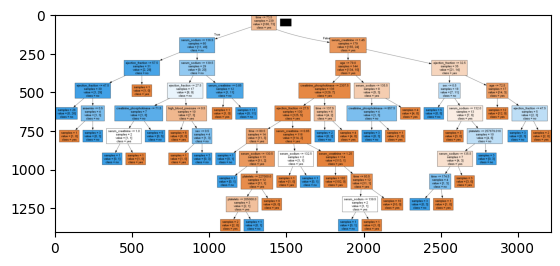

In [15]:
data = tree.export_graphviz(clasificador,feature_names=vi,class_names=clase,filled=True,impurity=False) #,max_depth=1)
graht = pydotplus.graph_from_dot_data(data)
graht.write_png("D:/3.-InteligenciaClase/imagenes/fallaCardiaca.png")
imagenes = plt.imread("D:/3.-InteligenciaClase/imagenes/fallaCardiaca.png")
plt.imshow(imagenes);